In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
from utils.pluto_utils import PlutoData
from utils.visualise import *

# output_dir

In [5]:
output_dir = "/home/yangelaxue/Documents/VUW/pluto_runs/HD/Blast-viscosity/nu1/"

# save_dir

In [6]:
save_dir = os.path.join(output_dir,"visualisation")

if not os.path.exists(save_dir):
    os.mkdir(save_dir)

# Load class

In [7]:
data = PlutoData(output_dir)
data.__dict__

{'output_dir': '/home/yangelaxue/Documents/VUW/pluto_runs/HD/Blast-viscosity/nu1/',
 'ndim': 2,
 'Units': <utils.pluto_utils.PlutoUnits at 0x76efb8702030>}

# Load data

In [8]:
units = 'code'

In [9]:
if data.ndim==2:
    X, Y = data.load_domain_from_HDF5(units=units)
elif data.ndim==3:
    X, Y, Z = data.load_domain_from_HDF5(units=units)
times = data.load_times(units=units)

In [10]:
times

array([0.        , 0.01819434, 0.03640434, 0.05924007, 0.07917953,
       0.09601723, 0.1163909 , 0.1281299 , 0.1552472 , 0.1708719 ,
       0.1880591 , 0.2069651 , 0.2277616 , 0.2506377 , 0.2758015 ,
       0.3034816 , 0.3339298 , 0.3674228 , 0.4042651 , 0.4447916 ,
       0.4893707 , 0.5357298 , 0.5789869 , 0.6192934 , 0.65676   ,
       0.6917089 , 0.7244944 , 0.7554436 , 0.7847633 , 0.8125622 ,
       0.8390155 , 0.8643683 ])

In [11]:
rho = data.load_data_from_HDF5('rho',units=units)

In [12]:
vx1 = data.load_data_from_HDF5('vx1',units=units)
vx2 = data.load_data_from_HDF5('vx2',units=units)

if data.ndim==2:
    v = [(_vx1**2 + _vx2**2)**.5 for _vx1,_vx2 in zip(vx1,vx2)]
elif data.ndim>2:
    vx3 = data.load_data_from_HDF5('vx3',units=units)
    v = [(_vx1**2 + _vx2**2 + _vx3**2)**.5 for _vx1,_vx2,_vx3 in zip(vx1,vx2,vx3)]

In [13]:
try:
    prs = data.load_data_from_HDF5('prs',units=units)
    prs_bool = True
except:
    prs_bool = False
    print("Pressure is not part of the simulation.")

In [14]:
try:
    Bx1 = data.load_data_from_HDF5('Bx1',units=units)
    Bx2 = data.load_data_from_HDF5('Bx2',units=units)
    
    if data.ndim==2:
        B = [(_Bx1**2 + _Bx2**2)**.5 for _Bx1,_Bx2 in zip(Bx1,Bx2)]
    elif data.ndim>2:
        Bx3 = data.load_data_from_HDF5('Bx3',units='code')
        B = [(_Bx1**2 + _Bx2**2 + _Bx3**2)**.5 for _Bx1,_Bx2,_Bx3 in zip(Bx1,Bx2,Bx3)]
    B_bool = True
except:
    B_bool = False
    print("Magnetism is not part of the simulation.")

Magnetism is not part of the simulation.


# Plots

In [15]:
XY = (X[0],Y[0]) if X.ndim==3 else (X,Y)
X, Y = XY

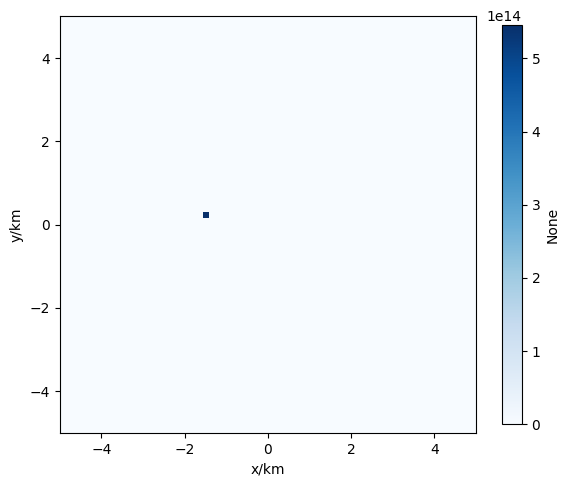

In [16]:
var_name = 'v'
t_idx = -1
vmin, vmax = None, None

if var_name=='v':
    var = v[t_idx]
    cmap = 'Blues'
    # cbar_label='v km/s'
    cbar_label='None'
elif var_name=='rho':
    var = rho[t_idx]
    cmap = 'plasma'
    # cbar_label='rho g/cm^3'
    cbar_label=r'$\rho$ $(m_p/cm^3)$'
elif var_name=='prs':
    var = prs[t_idx]
    cmap = 'Spectral'
    cbar_label='prs dyne/cm^2'
elif var_name in ['vx1','vx2','vx3']:
    if var_name=='vx1':
        var = vx1[t_idx]
    if var_name=='vx2':
        var = vx2[t_idx]
    if var_name=='vx3':
        var = vx3[t_idx]
    var /= 1e5
    vmax = np.max(np.abs(var))
    vmin = -vmax
    cmap = 'bwr'
    cbar_label=f'{var_name} km/s'
    

fig, ax = plt.subplots(1,1,figsize=(6,6),tight_layout=True)

ax.set_aspect('equal')
ax.set_xlabel('x/km')
ax.set_ylabel('y/km')

im = ax.pcolormesh(X,Y,var,
                   cmap=cmap
                  )

# ax.set_xlim(-.3,-.1)
# ax.set_ylim(.3,.5)

fig.colorbar(im,shrink=.7,label=cbar_label)
plt.show()

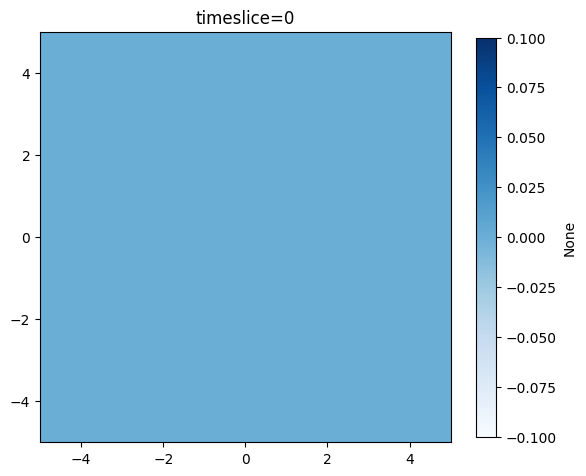

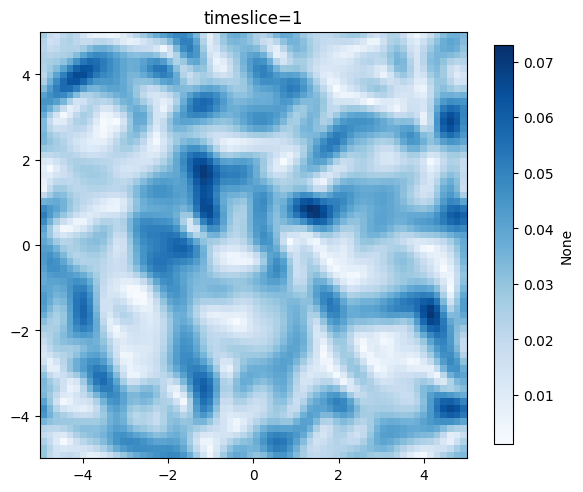

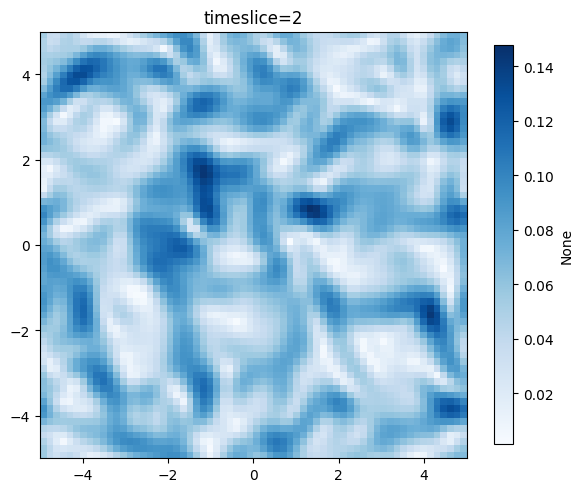

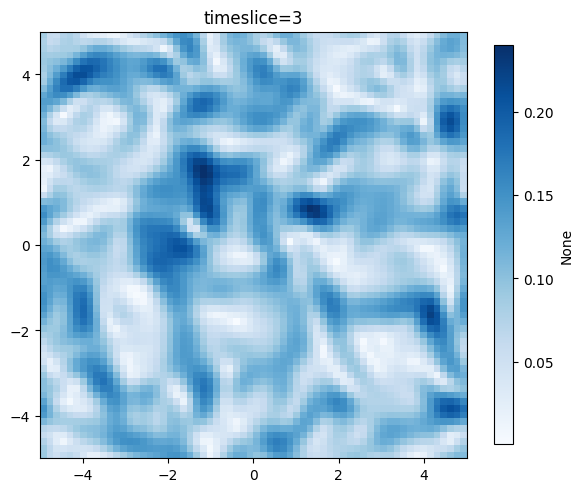

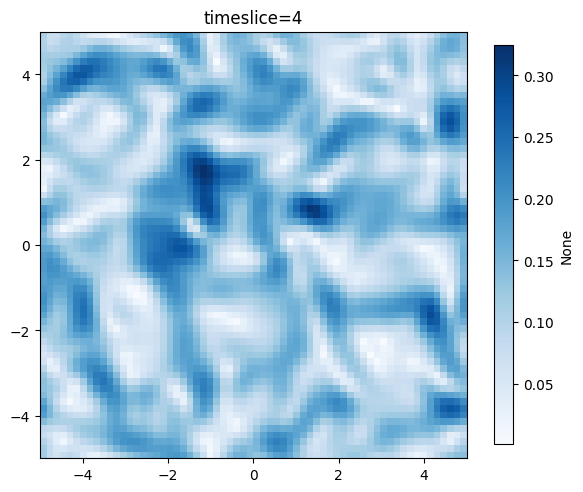

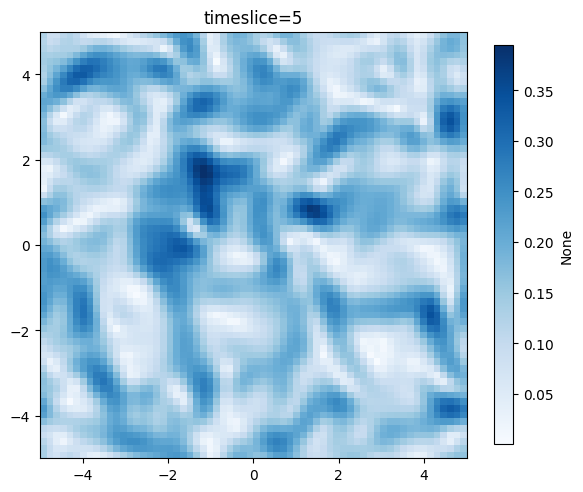

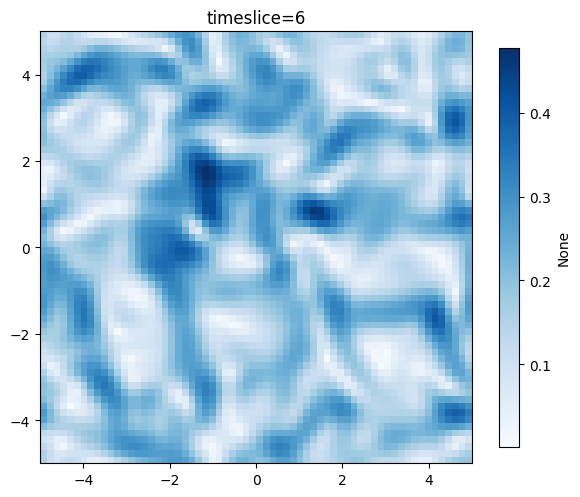

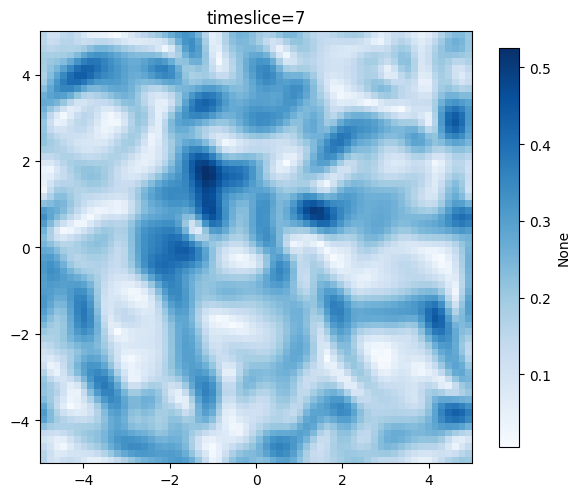

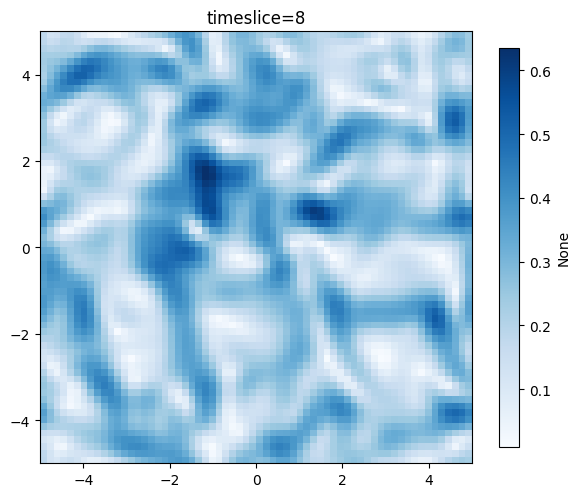

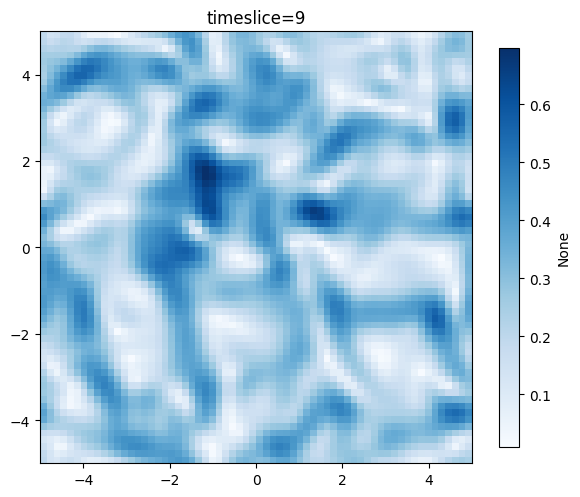

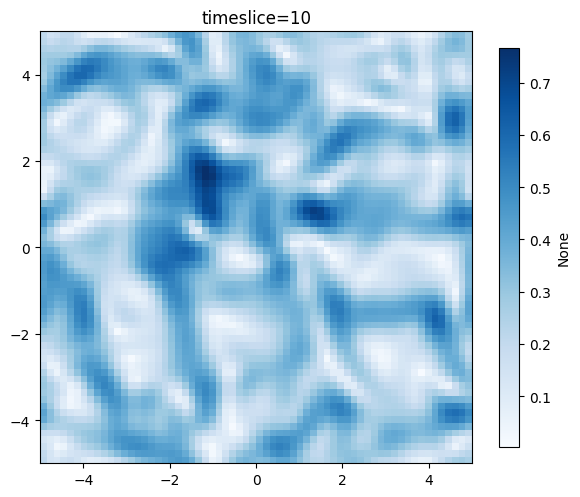

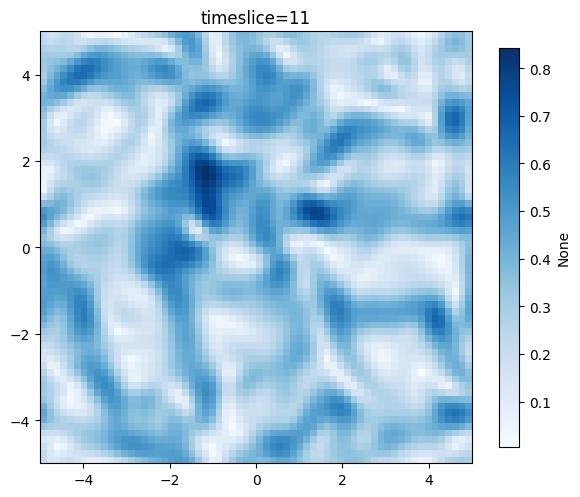

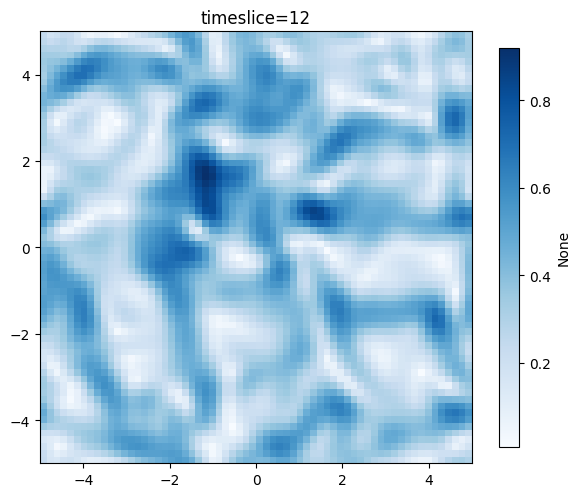

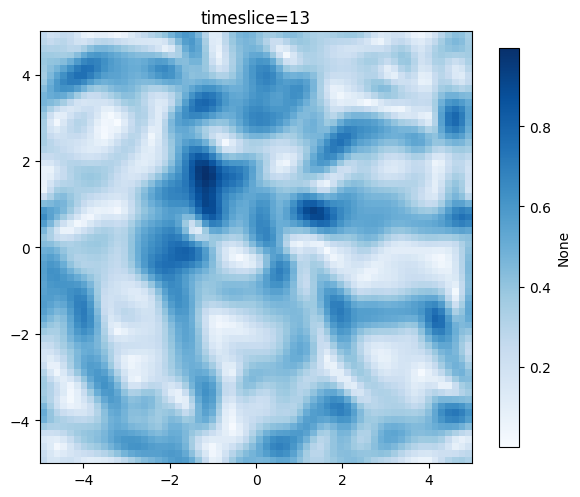

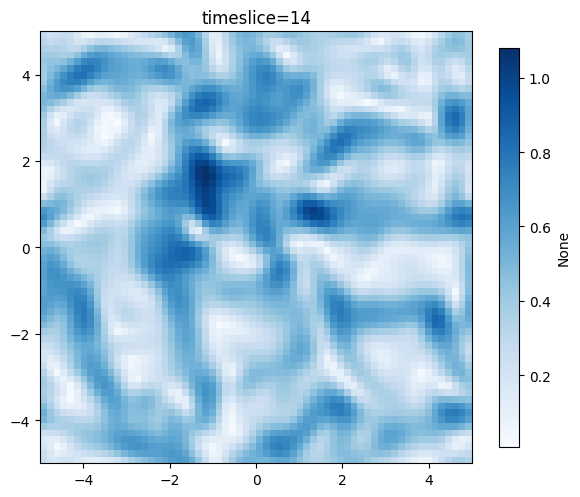

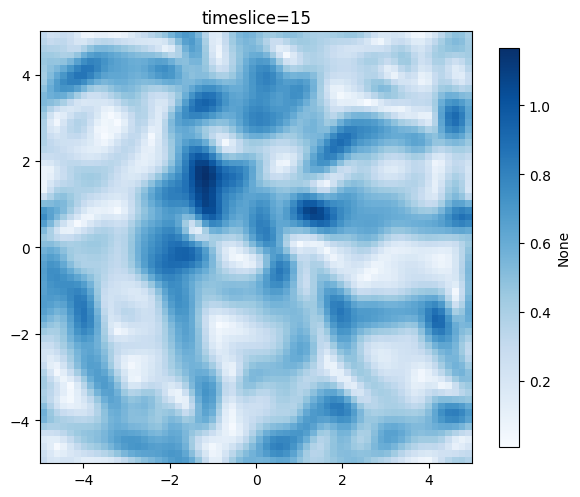

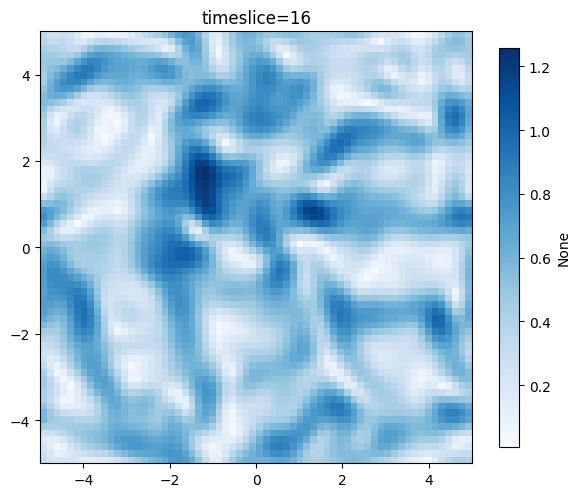

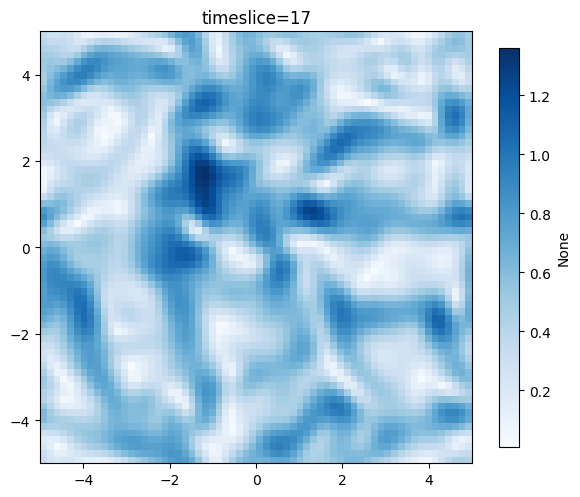

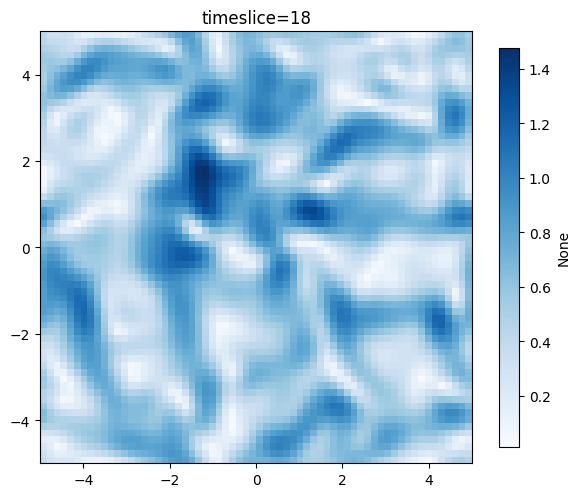

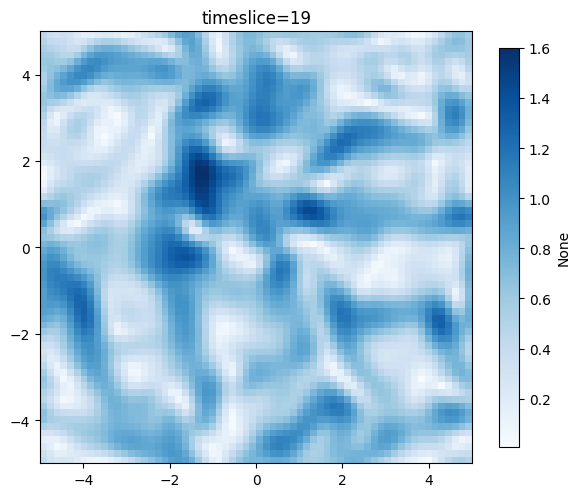

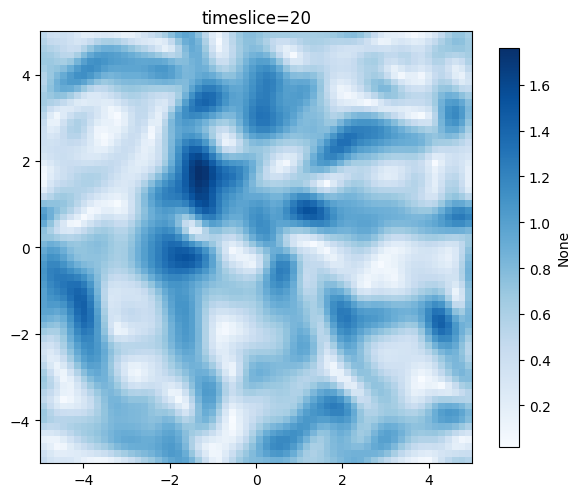

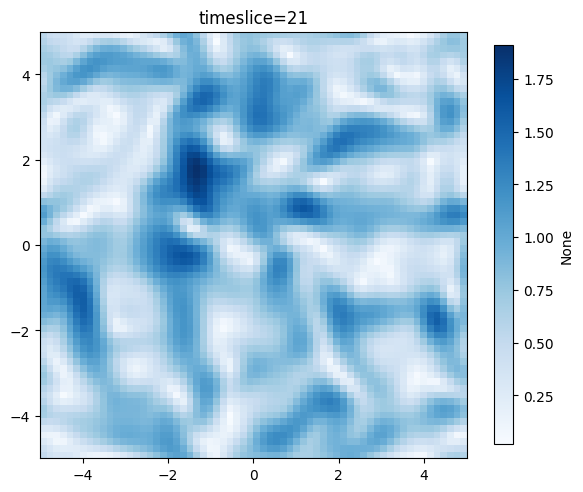

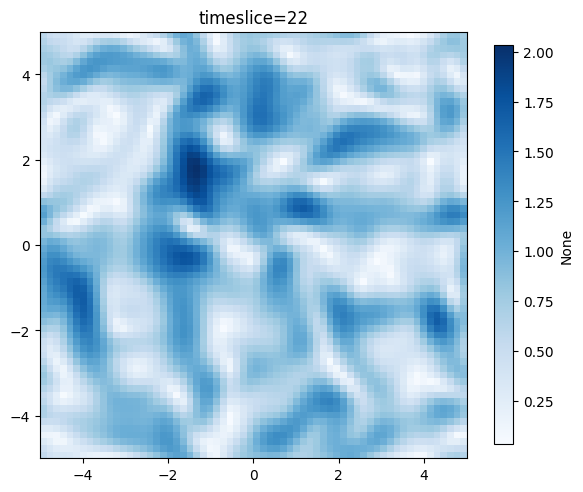

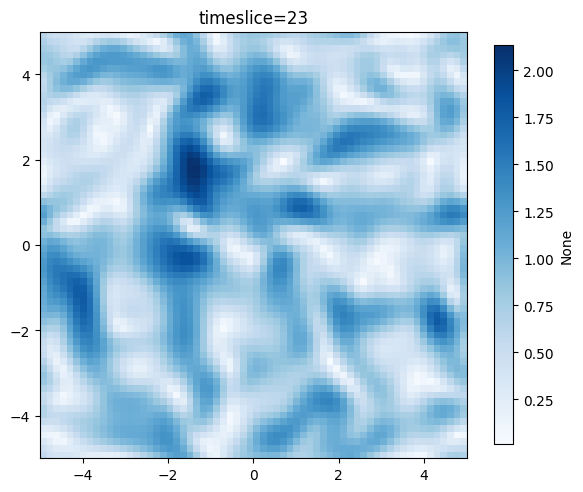

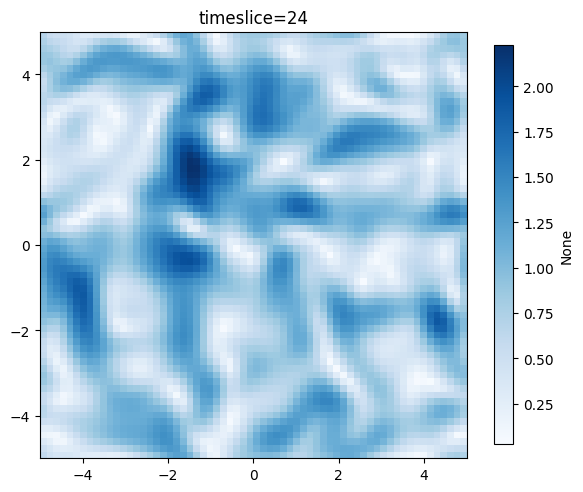

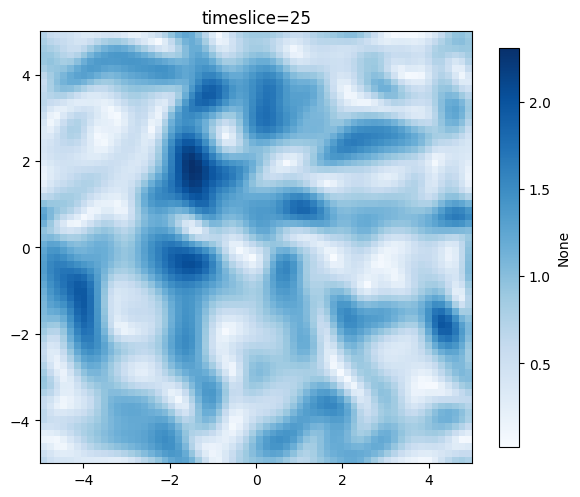

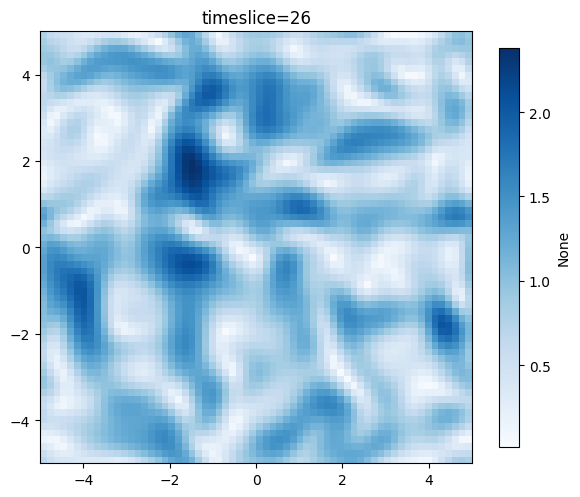

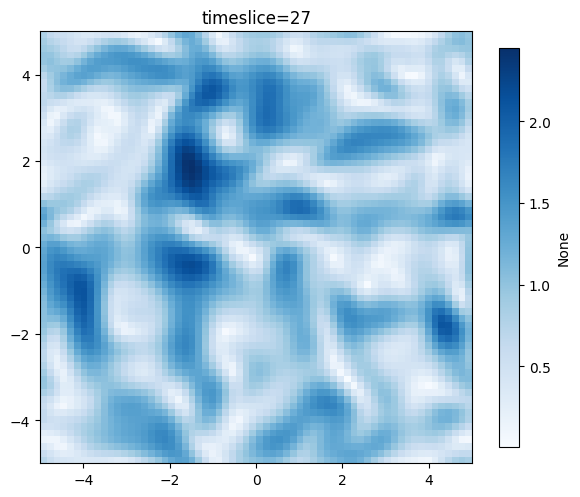

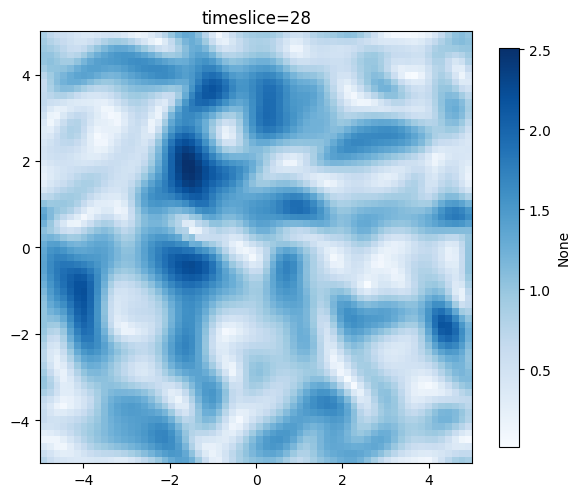

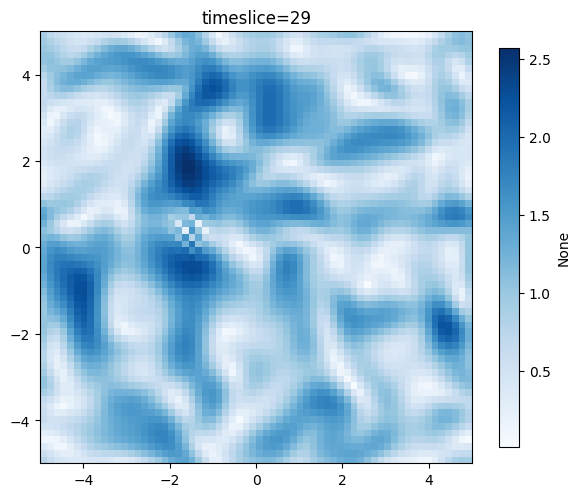

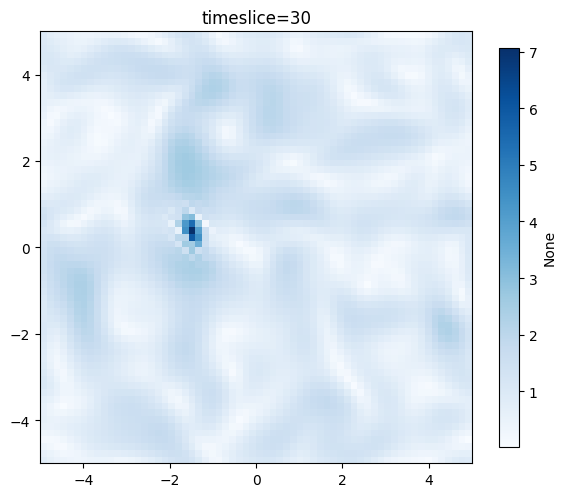

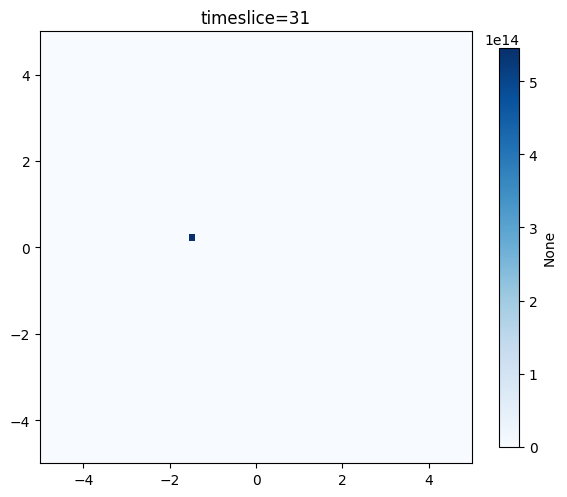

In [20]:
for i in range(len(times)):
    fig, ax = plt.subplots(1,1,figsize=(6,6),tight_layout=True)

    ax.set_aspect('equal')
    # ax.set_xlabel('x/km')
    # ax.set_ylabel('y/km')
    ax.set_title(f'timeslice={i}')
    
    im = ax.pcolormesh(X,Y,v[i],
                       cmap='Blues'
                  )
    
    # ax.set_xlim(-.3,-.1)
    # ax.set_ylim(.3,.5)
    
    fig.colorbar(im,shrink=.7,label=cbar_label)
    plt.show()

In [93]:
np.where(np.max(v[-1])==v[-1])

(array([17]), array([68]))

In [94]:
np.max(rho[-1])

10.314225288797338

In [95]:
len(v)

6

# Animations

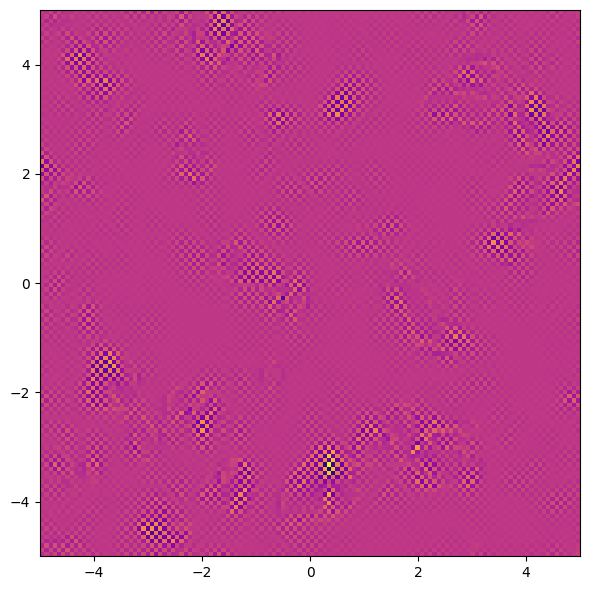

In [96]:
var_name = 'rho'

_var_list = get_list2D(rho,32)
_var_list = [_x for _x in _var_list]
# vmin, vmax = np.min(_var_list), np.max(_var_list)
# vmin, vmax = 0, np.max(_var_list)
# vmin, vmax = 0, 50
vmin, vmax = None, None

animate_vars(_var_list,save_dir=os.path.join(save_dir,f'{var_name}.mp4'),title=f'{var_name}',
             # XY=(X/1e5,Y/1e5),
            XY=(X,Y),
            xlabel='x/km',ylabel='y/km',
            vmin=vmin,vmax=vmax,
            cmap='plasma',
            cbar_label=r'density $(m_p/cm^3)$'
            )

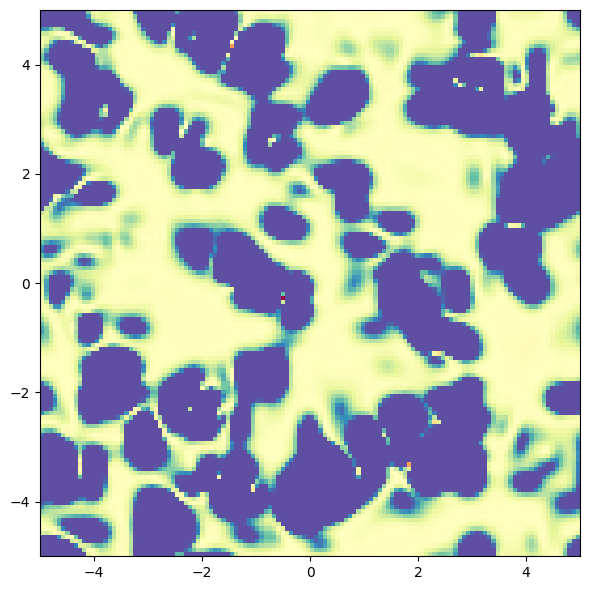

In [97]:
if prs_bool:
    _var_list = get_list2D(prs,32)

    var_name = 'prs'
    
    # vmin, vmax = np.min(_var_list), np.max(_var_list)
    # vmin, vmax = 0, np.max(_var_list)
    
    animate_vars(_var_list,
                 save_dir=os.path.join(save_dir,f'{var_name}.mp4'),
                 title=f'{var_name}',
                XY=(X,Y),
                vmin=vmin,vmax=vmax,
                cmap='Spectral_r',
                cbar_label=r'pressure $(dyne/cm^2)$'
                )

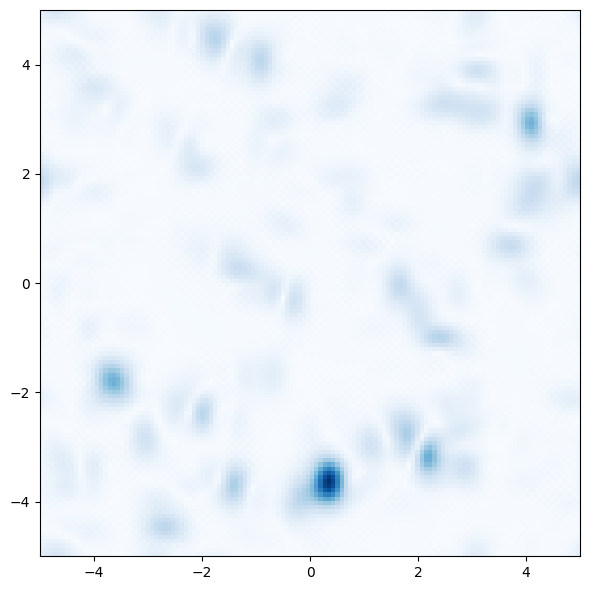

In [98]:
var_name = 'v'

_var_list = get_list2D(v,32)
_var_list = [_x for _x in _var_list]
# vmin, vmax = 0, np.max(np.abs(_var_list))
# vmin = -vmax
# vmax=None
# vmin=0
# vmin, vmax = 0, 50

animate_vars(_var_list,save_dir=os.path.join(save_dir,f'{var_name}.mp4'),title=f'{var_name}',
             XY=(X,Y),
            vmin=vmin,vmax=vmax,
            cmap='Blues',
            cbar_label=r'speed $(km/s)$'
            )

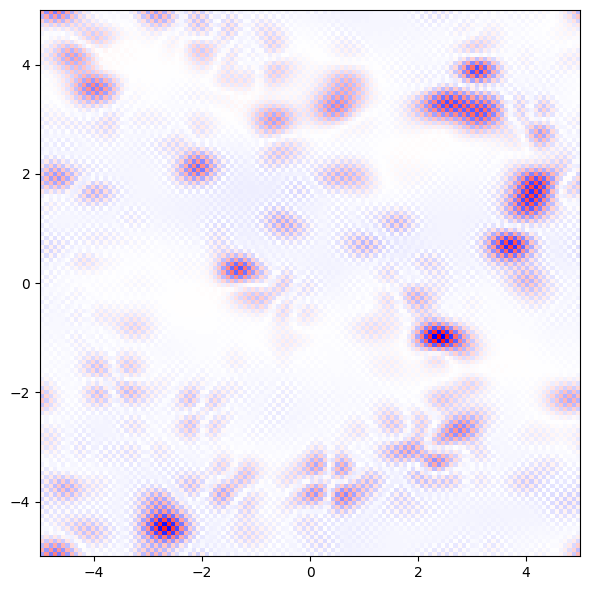

In [99]:
var_name = 'vx1'

_var_list = get_list2D(vx1,32)
_var_list = [_x for _x in _var_list]
# vmax = np.max(np.abs(_var_list))
# vmin = -vmax
# vmax=None
# vmin=0
# vmin, vmax = 0, 50

animate_vars(_var_list,save_dir=os.path.join(save_dir,f'{var_name}.mp4'),title=f'{var_name}',
             XY=(X,Y),
            vmin=vmin,vmax=vmax,
            cmap='bwr',
            cbar_label=r'speed $(km/s)$'
            )

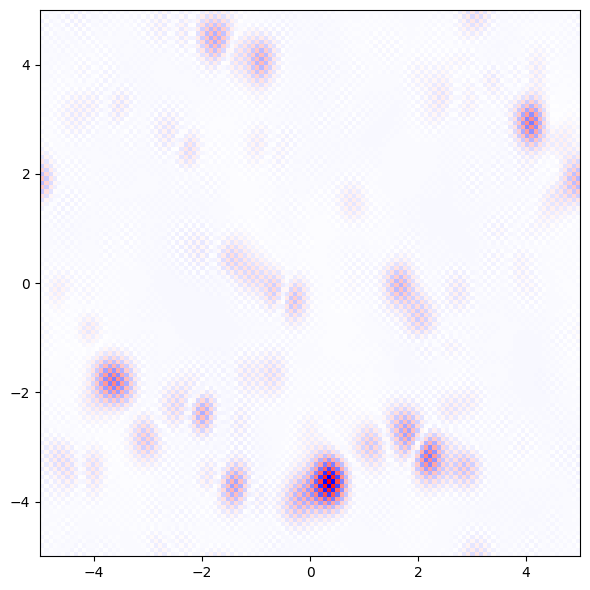

In [100]:
var_name = 'vx2'

_var_list = get_list2D(vx2,32)
_var_list = [_x for _x in _var_list]
# vmax = np.max(np.abs(_var_list))
# vmin = -vmax
# vmax=None
# vmin=0
# vmin, vmax = 0, 50

animate_vars(_var_list,save_dir=os.path.join(save_dir,f'{var_name}.mp4'),title=f'{var_name}',
             XY=(X,Y),
            vmin=vmin,vmax=vmax,
            cmap='bwr',
            cbar_label=r'speed $(km/s)$'
            )